# <span style="color: red"> Analysis of  four-point susceptibility function $\chi_4(t)$ from Molecular Simulations with Python code   </span>

In this Jupyter Notebook, we analyze the function $\chi_4(t)$, which is an important measure of the spatial fluctuations of the correlation function $Q(t)$. 

The function $\chi_4(t)$ is defined as:

\begin{equation} 
\chi_4(t) = \frac{1}{N} [\left \langle Q^2(t) \right \rangle - \left \langle Q(t) \right \rangle^2] = \frac{1}{N} \cdot Var(Q(t)) 
\end{equation}

This function measures the spatial fluctuations of the correlation function $Q(t)$, essentially representing the variance of $Q(t)$ with respect to the temporal mean.



**Important premise:** as written in the principal Jupyter notebook `NVE_simulation.ipynb` (the notebook used to perform our Python molecular simulation of the Kob-Andersen Lennard-Jones system in $3D$ system), length, energy and time scales are measured in units of $\sigma_{AA}$, $\epsilon_{AA}$ and $\sqrt{\frac{\sigma_{AA}^2}{ \epsilon_{AA}}}$ .

We have done simulation in the temperature range $T \in  [0.41, 3.0] K$. We have equilibrated the system for $\sim  10^7$   MD steps (for the `LAMMPS` simulations) depending on the system size and the production runs are at least $5 − 6$ times bigger than the equilibration runs. We have used integration time steps $\Delta t = 0.005$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import matplotlib.cm as cm

# Get the current directory
current_directory = os.getcwd()

print("La directory corrente è:", current_directory)

# Change current directory to 'chi_4' folder
os.chdir('chi_4')

current_directory = os.getcwd()

print("La directory corrente è:", current_directory)

La directory corrente è: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto
La directory corrente è: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto\chi_4


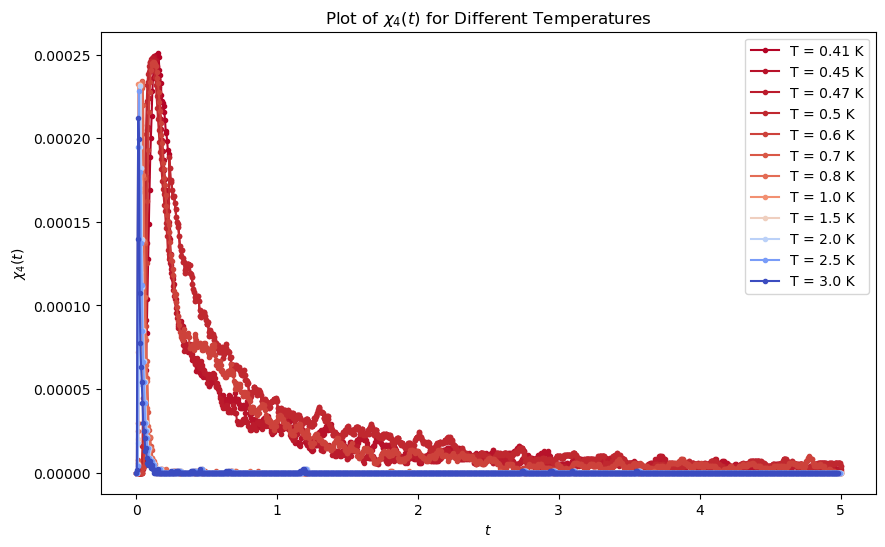

In [2]:
# Map of file names to corresponding temperatures
file_temperature_map = {
    "chi_4_T_0.41.txt": 0.41,
    "chi_4_T_0.45.txt": 0.45,
    "chi_4_T_0.47.txt": 0.47,
    "chi_4_T_0.50.txt": 0.50,
    "chi_4_T_0.60.txt": 0.60,
    "chi_4_T_0.70.txt": 0.70,
    "chi_4_T_0.80.txt": 0.80,
    "chi_4_T_1.00.txt": 1.0,
    "chi_4_T_1.50.txt": 1.50,
    "chi_4_T_2.00.txt": 2.0,
    "chi_4_T_2.50.txt": 2.5,
    "chi_4_T_3.00.txt": 3.0
}

# We utilize the same Δt of the Python simulations:
Deltat = 0.005

plt.figure(figsize=(10, 6))

# Normalize temperatures to map colors (just to have a better comparison with Karmakar's)
norm = plt.Normalize(min(file_temperature_map.values()), max(file_temperature_map.values()))

# We iterate over each file in the map
for file_name, temperature in file_temperature_map.items():

    chi_4 = np.loadtxt(file_name)
    
    # Time array:
    time = np.arange(len(chi_4)) * Deltat 
    
    # Get color from inverted colormap with 'coolwarm_r'
    color = cm.coolwarm_r(norm(temperature))
    
    # Plot chi_4(t):
    plt.plot(time, chi_4, label=f'T = {temperature} K', color=color, marker='o', markersize=3)

plt.xlabel(r'$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.title(r'Plot of $\chi_4(t)$ for Different Temperatures')

plt.legend()

# Grid
#plt.grid(True)

# Save chi_4(t) plot as png image:
plt.savefig('plot_chi_4_Python_Simulation.png')

plt.show()

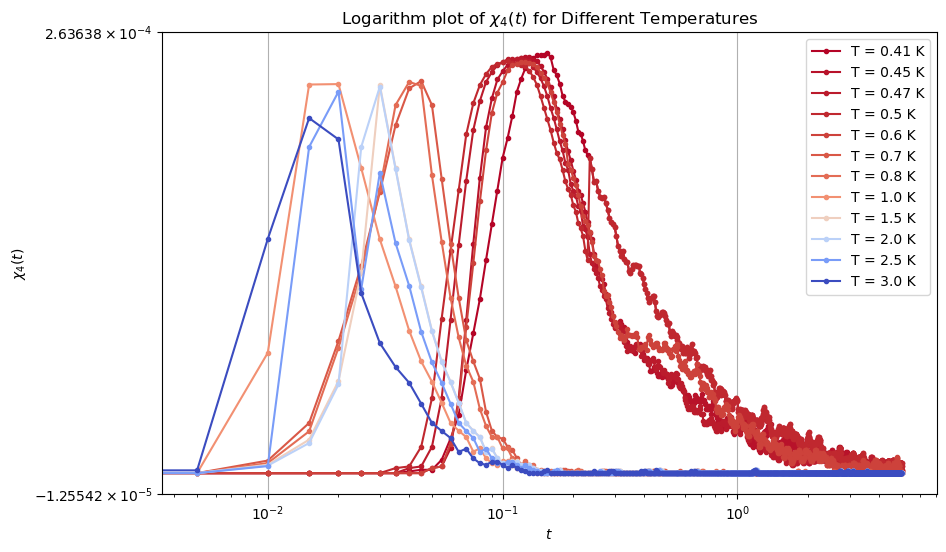

In [3]:
plt.figure(figsize=(10, 6))

# Normalize temperatures to map colors (just to have a better comparison with Karmakar's)
norm = plt.Normalize(min(file_temperature_map.values()), max(file_temperature_map.values()))

# We iterate over each file in the map
for file_name, temperature in file_temperature_map.items():

    chi_4 = np.loadtxt(file_name)
    
    # Time array
    time = np.arange(len(chi_4)) * Deltat 
    
    # Get the color from the inverted map
    color = cm.coolwarm_r(norm(temperature))
    
    # Logplot chi_4(t) 
    plt.loglog(time, chi_4, label=f'T = {temperature} K', color=color, marker='o', markersize=3)


plt.xlabel(r'$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.yscale('symlog')
plt.title(r'Logarithm plot of $\chi_4(t)$ for Different Temperatures')


plt.legend()

plt.grid(True)

# Save chi_4(t) plot as png image:
plt.savefig('plot_chi_4_Python_Simulation_loglog.png')

plt.show()

From Kamarkar paper: "In the left panel of Fig.2 we have plotted $\chi_4(t)$ as a function of time for different temperatures. $\chi_4(t)$ shows a peak at time close to the $\alpha$-relaxation time and both the peak height and peak position increase with decreasing temperature. The peak height $\chi_4^P$ measures the typical size of the cooperatively rearranging region (CRR) in the system."

We can see this figure below, in which he kept as y-label the average value of $Q(t)$ computed considering all the particles at each timestep:
![Kamarkar_Chi_4_vs_t_different_Temperatures](chi_4/kamarkar_chi_4_different_temperatures.png)

It follows that: "This peak value of $\chi_4(t)$, $\chi_4^P$ has been found to show finite size effect and the effect becomes much more stronger as one decreases temperature." 

Kamarkar reported a plot in which can be observed that how the system size ($N$ number of atoms) have dependence on $\chi_4^P$ for different temperatures for Kob-Andersen model in three dimensions ($d=3$)  and one can clearly see that at higher temperature, the dependence is weak and it grows with decreasing temperature.

![Kamarkar_plot_chi_4_vs_system_size_diff_temperatures](chi_4/kamarkar_chi_4_P_different_temperatures_and_N_atoms.png)

We kept fixed the system size to $N=1000$ atoms but we can make a visual comparison as regards the peak $\chi_4^P$ as the temperature $T$ varies.

In [4]:
def find_max_chi_4(chi_4):

#Find the maximum value of chi_4 and the corresponding index.
    max_value = np.max(chi_4)
    max_index = np.argmax(chi_4)
    
    return max_value, max_index

In [5]:
max_chi_4_values = []
tau_4_values = []

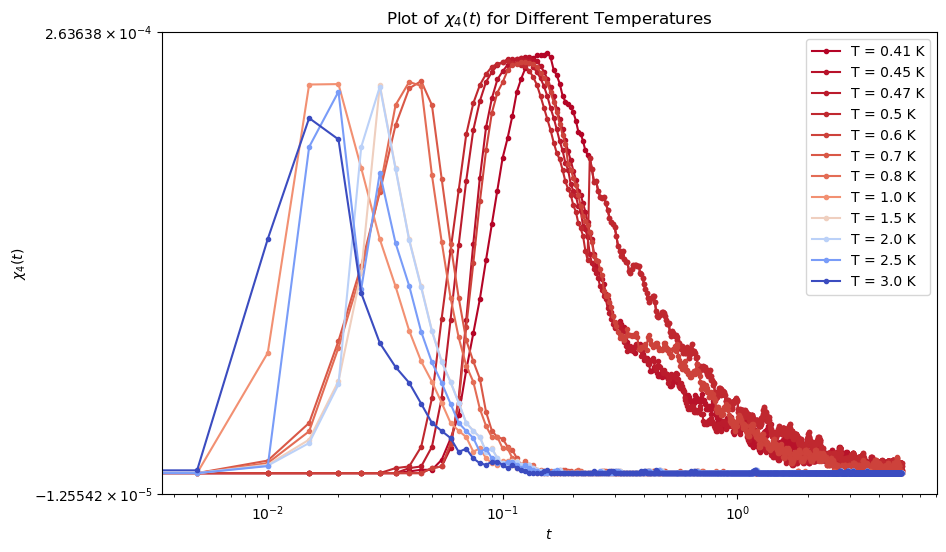

Temperature: 0.41 K, max chi_4: 0.000251084, tau_4: 0.155
Temperature: 0.45 K, max chi_4: 0.00024897499999999997, tau_4: 0.125
Temperature: 0.47 K, max chi_4: 0.000247919, tau_4: 0.12
Temperature: 0.5 K, max chi_4: 0.00024627599999999997, tau_4: 0.105
Temperature: 0.6 K, max chi_4: 0.00024578500000125, tau_4: 0.12
Temperature: 0.7 K, max chi_4: 0.000234375, tau_4: 0.045
Temperature: 0.8 K, max chi_4: 0.000233871, tau_4: 0.04
Temperature: 1.0 K, max chi_4: 0.00023257600000000002, tau_4: 0.02
Temperature: 1.5 K, max chi_4: 0.000232076, tau_4: 0.03
Temperature: 2.0 K, max chi_4: 0.00023105, tau_4: 0.03
Temperature: 2.5 K, max chi_4: 0.00022805000000000001, tau_4: 0.02
Temperature: 3.0 K, max chi_4: 0.00021225, tau_4: 0.015


In [6]:
# Normalize temperatures to map colors (just to have a better comparison with Karmakar's)
norm = plt.Normalize(min(file_temperature_map.values()), max(file_temperature_map.values()))

plt.figure(figsize=(10, 6))
# We iterate over each file in the map
for file_name, temperature in file_temperature_map.items():

    chi_4 = np.loadtxt(file_name)
    
    # Time array:
    time = np.arange(len(chi_4)) * Deltat 
    
    # Compute max value and index of chi_4 curve 
    max_value, max_index = find_max_chi_4(chi_4)
    tau_4 = time[max_index]
    
    # Save results in arrays
    max_chi_4_values.append(max_value)
    tau_4_values.append(tau_4)
    
    # Get color from inverted colormap with 'coolwarm_r'
    color = cm.coolwarm_r(norm(temperature))
    
    # Plot chi_4(t):
    plt.loglog(time, chi_4, label=f'T = {temperature} K', color=color, marker='o', markersize=3)

plt.xlabel(r'$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.yscale('symlog')
plt.title(r'Plot of $\chi_4(t)$ for Different Temperatures')

plt.legend()

# Grid
#plt.grid(True)

# Save chi_4(t) plot as png image:
plt.savefig('plot_chi_4_Python_Simulation_with_maximum.png')

plt.show()

# Print results:
for temperature, max_value, tau_4 in zip(file_temperature_map.values(), max_chi_4_values, tau_4_values):
    print(f"Temperature: {temperature} K, max chi_4: {max_value}, tau_4: {tau_4}")

In [7]:
os.chdir('../Q(t)')
# Get the current directory
current_directory = os.getcwd()
print("Current directory is:", current_directory)

# Load file with tau_alpha times value for each T:
filename = "tau_alpha_values.txt"
tau_alpha = np.loadtxt(filename)

# Go back to 'chi_4' folder:
os.chdir('../chi_4')
# Get the current directory
current_directory = os.getcwd()
print("Current directory is:", current_directory)

Current directory is: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto\Q(t)
Current directory is: C:\Users\emanu\OneDrive - Politecnico di Milano\POLIMI\II ANNO\II SEMESTRE\MOLECULAR MODELING OF MATERIALS\Progetto\chi_4


### Steps to normalize  $\chi_4(t)$ function

In [8]:
# Calculate the global maximum between all the peaks of $\chi_4(t)$:
global_max_chi_4 = max(max_chi_4_values)

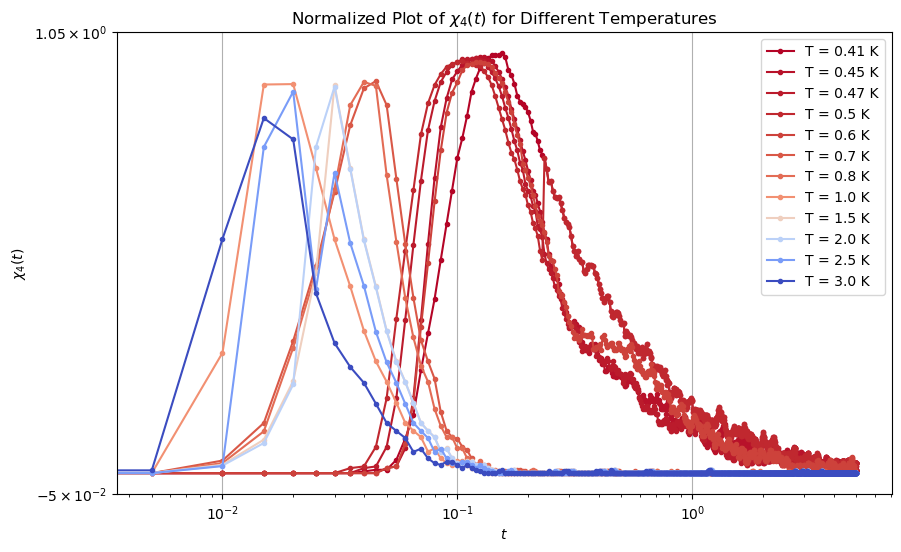

In [9]:
plt.figure(figsize=(10, 6))

# We iterate over each file in the map
for file_name, temperature in file_temperature_map.items():
    chi_4 = np.loadtxt(file_name)
    
    # normalize values of chi_4
    chi_4_normalized = chi_4 / global_max_chi_4
    
    # Time array:
    time = np.arange(len(chi_4)) * Deltat 
    
    #  Get color from inverted colormap with 'coolwarm_r'
    color = cm.coolwarm_r(norm(temperature))
    
    # Plot
    plt.loglog(time, chi_4_normalized, label=f'T = {temperature} K', color=color, marker='o', markersize=3)


plt.xlabel(r'$t$')
plt.ylabel(r'$\chi_4(t)$')
plt.yscale('symlog')
plt.title(r'Normalized Plot of $\chi_4(t)$ for Different Temperatures')

plt.legend()
plt.grid(True)

# Save normalized plot as png image:
plt.savefig('plot_chi_4_Python_Simulation_normalized.png')

plt.show()


As we can observe in the plot above, both the peak height $\chi_4^P$ and peak position $\tau_4$ increase with decreasing temperature, as predicted by theory from Kamarkar's paper.

From paper: "The peak height measures the typical size of the cooperatively rearranging region (CRR) in the system.
This peak value of $\chi_4(t)$, $\chi_4^P$ has been found to show finite size effect and the effect becomes much more stronger as one decreases temperature."

For a better understanding:
* **Cooperatively Rearranging Region (CRR)**: a region of the system where particles or atoms move and rearrange themselves together in a coordinated manner. The size of this region is important because it reflects the dynamic characteristics of the system, such as how organized or disorganized it is.

* **Finite Size Effect**: this effect refers to the fact that measurements of $\chi_4(t)$ are affected by the size of the sample or system being studied. In smaller systems, the finite size effect can be more pronounced, meaning that $\chi_4^P$ can vary depending on the size of the sample.

* **Temperature Dependence**: the finite size effect becomes stronger as the temperature decreases. At lower temperatures, $\chi_4^P$ may show more pronounced variations due to this effect, making the system more sensitive to the finite size of the sample.

### Check on comparison between $\tau_4$ and $\tau_{\alpha}$

As reported in the notebook `analysis_Q(t).ipynb`, in the Kamarkar's paper is written that: 'The peak value of $\chi_4(t)$ is defined as $\chi_4^P  \equiv  \chi_4(t = \tau_4)$, where $\tau_4$ is the time at which $\chi_4(t)$ attains its maximum value (see left panel of Fig.2) and  $\tau_4  \simeq \tau_{\alpha}$ at all temperatures $T$.'

#### Visual comparison:

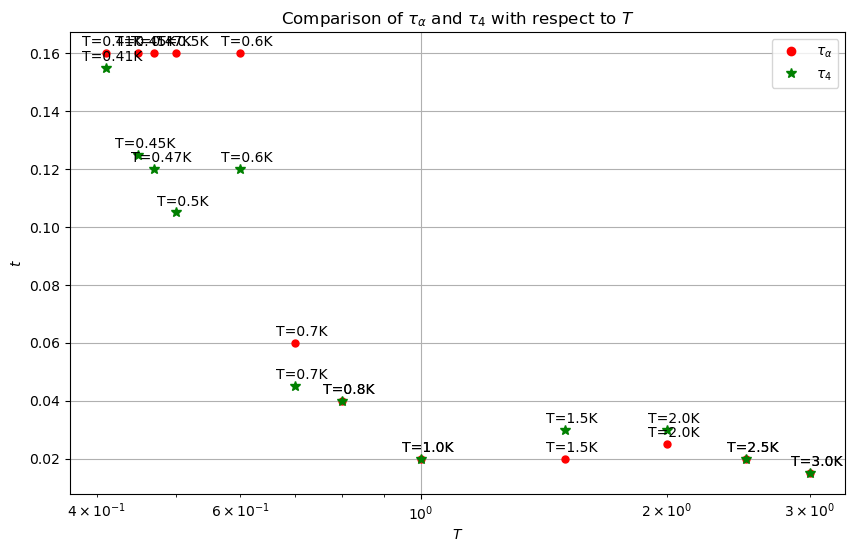

In [10]:
import matplotlib.lines as mlines
plt.figure(figsize=(10, 6))

# Plot per tau_alpha
for temperature, tau_alpha_time in zip(file_temperature_map.values(), tau_alpha):
    plt.plot(temperature, tau_alpha_time, 'o', color='red', markersize=5)

# Plot per tau_4
for temperature, tau_4_time in zip(file_temperature_map.values(), tau_4_values):
    plt.plot(temperature, tau_4_time, '*', color='green', markersize=7)

# Special Labels with 'mlines' module:
red_dot = mlines.Line2D([], [], color='red', marker='o', markersize=6, linestyle='None', label=r'$\tau_{\alpha}$')
green_star = mlines.Line2D([], [], color='green', marker='*', markersize=7, linestyle='None', label=r'$\tau_4$')

plt.legend(handles=[red_dot, green_star])

# Points annotation:
for temperature, tau_alpha_time, tau_4_time in zip(file_temperature_map.values(), tau_alpha, tau_4_values):
    plt.annotate(f'T={temperature}K', 
                 (temperature, tau_alpha_time), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center')
    plt.annotate(f'T={temperature}K', 
                 (temperature, tau_4_time), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center')

plt.xlabel(r'$T$')
plt.ylabel(r'$t$')
plt.xscale('log')
plt.grid(True)
plt.title(r'Comparison of $\tau_{\alpha}$ and $\tau_4$ with respect to $T$')

# Save plot as png image: 
plt.savefig('plot_tau_comparison_vs_T_swapped.png')

plt.show()

In [17]:
temperature = np.array([0.41, 0.45, 0.47, 0.50, 0.60, 0.70, 0.80, 1.0, 1.50, 2.0, 2.5, 3.0])
print(f"T: {temperature}")
print(f"τ_α: {tau_alpha}")
print(f"τ_4: {tau_4_values}")

T: [0.41 0.45 0.47 0.5  0.6  0.7  0.8  1.   1.5  2.   2.5  3.  ]
τ_α: [0.16  0.16  0.16  0.16  0.16  0.06  0.04  0.02  0.02  0.025 0.02  0.015]
τ_4: [0.155, 0.125, 0.12, 0.105, 0.12, 0.045, 0.04, 0.02, 0.03, 0.03, 0.02, 0.015]


# Observations on the data:

* **Behavior at High Temperatures**:

At higher temperatures ($T > 1.0 K$), the values ​​of $\tau_{\alpha}$ and $\tau_4$ are very close to each other. This is in line with the paper's expectation that for high temperatures the two characteristic times should be similar. The differences between $\tau_{\alpha}$ and $\tau_4$ are minimal in this temperature range.

* **Behavior at Low Temperatures**:

For lower temperatures ($T < 1.0 K$), the discrepancies between $\tau_{\alpha}$ and $\tau_4$ are more pronounced.

For example:
- At $T = 0.45 K$, $\tau_{\alpha}=0.16$ while $\tau_4=0.125$ .
- At $T = 0.5 K$, $\tau_{\alpha}=0.16$ while $\tau_4=0.105$.

These differences increase as the temperature decreases, with $\tau_{\alpha}$ remaining relatively high compared to $\tau_4$. This suggests that at low temperatures the two characteristic times diverge more significantly than at higher temperatures.

[1.         0.99160042 0.98739466 0.98085103 0.97889551 0.93345255
 0.93144525 0.92628762 0.92429625 0.92020997 0.90826178 0.84533463]
[0.41 0.45 0.47 0.5  0.6  0.7  0.8  1.   1.5  2.   2.5  3.  ]


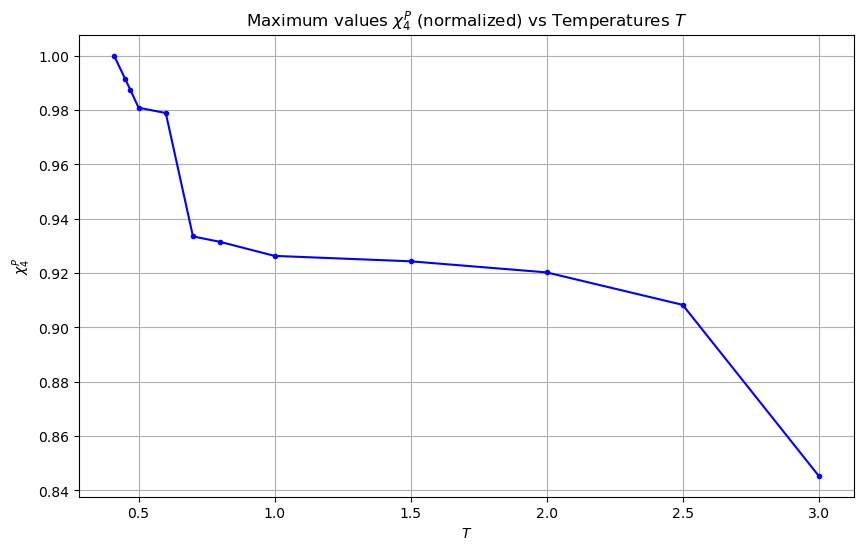

In [22]:
max_chi_4_values_normalized = max_chi_4_values / global_max_chi_4
print(max_chi_4_values_normalized)
print(temperature)

plt.figure(figsize=(10, 6))

plt.plot(temperature, max_chi_4_values_normalized, color='blue', marker='o', markersize=3 )

plt.xlabel(r'$T$')
plt.ylabel(r'$\chi_4^P$')
plt.title(r'Maximum values $\chi_4^P$ (normalized) vs Temperatures $T$')

#plt.legend()
plt.grid(True)

# Save normalized plot as png image:
plt.savefig('plot_chi_4P_Python_vs_T.png')

plt.show()

As we can see from the figure above regarding the Kamarkar plot of $\chi_4^P(T,N)$ versus $N$, our obtained plot seems to follow rightly the theoretical trend. We have $N=1000$ fixed, so we can observe that the maximum values of the four-susceptibiliy function tend to grow when the temperature $T$ becomes lower.  